In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= F:\PyDFN3D\Examples


In [2]:
Case1=dfnpy.DFN_Model()
#Case1.loadDFN('..\Datas\DFN_2fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs_Well.dat')
Case1.loadDFN('..\Datas\dfnworks_4rects_Well.dat')

[Input] Reading "..\Datas\dfnworks_4rects_Well.dat" DFN file....
Dimension= 3
Number of Points= 25
Number of Fractures= 4
Number of Intersections= 3
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2]
Fracture 1 has Intersections of  [0]
Fracture 2 has Intersections of  [1]
Fracture 3 has Intersections of  [2]


In [3]:
h_mesh_frac=1/8
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:60(Total) 36(Edge) 24(Trace)
[Mesh] Number of Nodes:180(Total) 108(Edge) 72(Trace) 0(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:37(Total) 28(Edge) 8(Trace)
[Mesh] Number of Nodes:109(Total) 84(Edge) 24(Trace) 1(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:37(Total) 28(Edge) 8(Trace)
[Mesh] Number of Nodes:109(Total) 84(Edge) 24(Trace) 1(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:37(Total) 28(Edge) 8(Trace)
[Mesh] Number of Nodes:109(Total) 84(Edge) 24(Trace) 1(Source)
Total DOF= 507


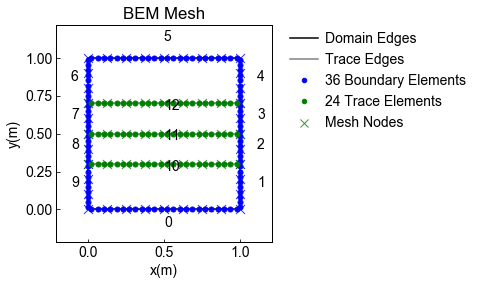

In [4]:
Case1.FlowSolver.showMesh(0)

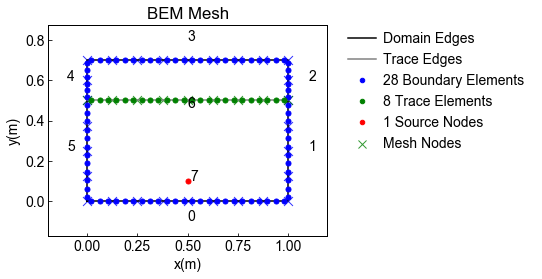

In [5]:
Case1.FlowSolver.showMesh(1)

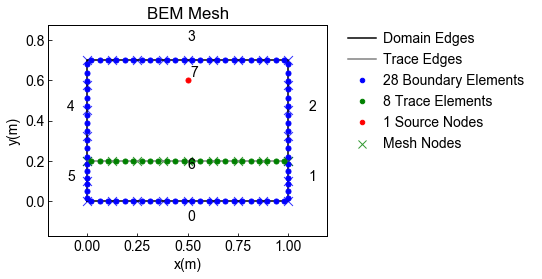

In [6]:
Case1.FlowSolver.showMesh(2)

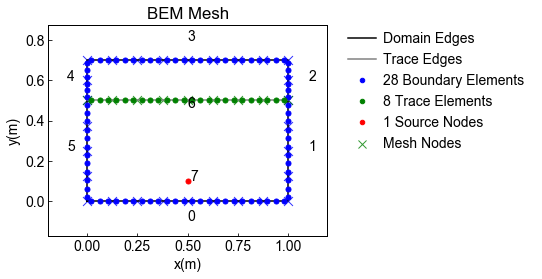

In [7]:
Case1.FlowSolver.showMesh(3)

In [8]:
#PresssureBC=[(10,100.0)]
#Case1.setBoundaryConditions(fracID=0,DirichletBC=PresssureBC)

PresssureBC=[(7,1e6)]
Case1.setBoundaryConditions(fracID=1,DirichletBC=PresssureBC)

#PresssureBC=[(3,2e6)]
PresssureBC=[(7,2e6)]
Case1.setBoundaryConditions(fracID=2,DirichletBC=PresssureBC)

PresssureBC=[(7,1e6)]
Case1.setBoundaryConditions(fracID=3,DirichletBC=PresssureBC)

Case1.setFracProperties(perm=3e-10,aperature=0.01)

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 1000000.0)]


[Solution] #DOFs= 180
[Solution] #DOFs= 109
[Solution] #DOFs= 109
[Solution] #DOFs= 109
10	0.0271131877800674		alpha:	17858074.39184718
20	0.13581935877083778		alpha:	27526061.19847824
30	0.005241265840021167		alpha:	14149293.338190045
40	0.0021601641637895882		alpha:	28492440.8499579
50	0.0014753375292839576		alpha:	68220854.15109171
60	0.0013120522094292513		alpha:	26120029.05764507
70	2.4152136016862028e-05		alpha:	17392513.800794065
80	4.7935087750023916e-05		alpha:	36952583.636134066
90	1.6901385837495776e-06		alpha:	10766815.355452275
100	3.218699244396579e-05		alpha:	155144704.78032973
110	1.7019182934033754e-06		alpha:	11881889.04432642
120	1.213131782269886e-06		alpha:	76041340.45183761
130	1.3700191099884252e-07		alpha:	10988383.68558606
140	8.334175677394272e-08		alpha:	107313511.13667816
150	7.3763942405823975e-09		alpha:	13433357.937022604
160	7.351588661773099e-09		alpha:	49504018.57713584
170	1.2933775407915663e-09		alpha:	11615426.642641557
180	8.682061564868668e-09		al

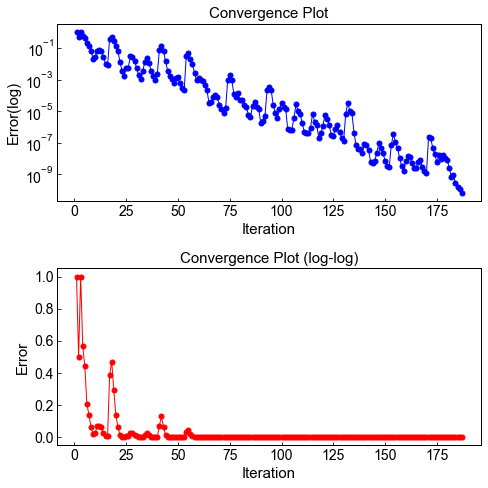

In [9]:
Case1.solveFlow(max_iters=500,tolerance=1e-10)

In [11]:
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_4fracs_Well.msh',fname='DFN_4fracs_Well.vtp')
Mesh=Case1.writeSolution(mesh_input='..\Datas\dfnworks_4rects_gmsh.msh',fname='dfnworks_4rects.vtp')

[Output] Saved VTK mesh and solution file Results\dfnworks_4rects.vtp_solution.vtu) !


In [93]:
Case1.FlowSolver.SubProblems[2].get_Solution((0.5,0.5))

(1764705.8823369704, -4.538385837804526e-13, -0.3529411764944523)

In [94]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1117647.0588054599, -3.891909727826714e-13, -0.17647058820819403)

In [95]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1117647.0588054836, 4.2908468458335844e-13, -0.1764705882081352)

In [96]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [82]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 5, 5]]

In [83]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [84]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]